In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Vertex AI 임베딩 소개 - 텍스트 및 멀티모달 임베딩

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/intro_Vertex_AI_embeddings.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fqa-ops%2Fintro_Vertex_AI_embeddings.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/intro_Vertex_AI_embeddings.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/qa-ops/intro_Vertex_AI_embeddings.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
</table>

| | |
|-|-|
|Author(s) | [Lavi Nigam](https://github.com/lavinigam-gcp) , [Kaz Sato]()  |

## 개요


이 노트북에서는 텍스트와 멀티모달(이미지 및 비디오) 모두를 위한 Vertex AI Embeddings API를 살펴봅니다. 바로 시작하기 전에 임베딩이 무엇인지 이해해 볼까요?



**임베딩: 콘텐츠를 숫자로 변환**


친구의 성격을 다른 사람에게 설명하려고 한다고 상상해 보세요. "친절하다", "에너지가 넘친다", "사려 깊다"와 같은 단어를 사용할 수 있습니다. 하지만 이러한 각 특성에 일련의 숫자를 할당하여 친구를 위한 고유한 코드를 만들 수 있다면 멋지지 않을까요?


임베딩은 다양한 유형의 콘텐츠에 대해 유사한 작업을 수행합니다.


* **텍스트의 경우:** 각 단어, 문장 또는 전체 문서도 숫자 목록(벡터)으로 변환됩니다. 이 숫자는 단어 간의 의미와 관계를 포착합니다. 예를 들어, "cat"이라는 단어는 [0.25, -0.18, 0.93...]으로 표시될 수 있고 "kitten"은 [0.30, -0.16, 0.88...]로 표시될 수 있습니다. 이러한 벡터의 근접성은 의미론적 연결을 나타냅니다.




* **이미지의 경우:** 픽셀을 대신하여 이미지의 시각적 특징을 나타내는 벡터가 됩니다. 햇볕이 잘 드는 해변의 사진은 [0.85, 0.42, -0.05...]로 변환될 수 있는 반면, 눈 덮인 산은 [-0.32, 0.78, 0.12...]로 변환될 수 있습니다.




* **동영상의 경우:** 각 프레임 또는 전체 동영상 시퀀스는 시각적 콘텐츠, 움직임 및 잠재적으로 오디오 정보까지 캡슐화하는 수치 표현을 얻습니다.




또 다른 예를 들어 보겠습니다. 책, 사진, 영화 DVD 등 일치하지 않는 항목이 들어 있는 거대한 상자가 있다고 상상해 보십시오. 각 항목은 독특하고 복잡하지만, 이를 이해하기 쉬운 방식으로 구성하고 싶습니다. 이런 역할을 수행해주는 것이 임베딩입니다. 텍스트, 이미지, 비디오와 같은 데이터에만 적용되지만요.




기본적으로 임베딩은 데이터를 단순화된 방식으로 나타내는 비밀 코드와 같습니다. 지도의 숫자 좌표로 생각해보세요. 유사한 항목(예: 동일한 주제에 대한 책, 동일한 장소의 사진)은 이 지도에서 서로 가까이 있는 반면, 매우 다른 항목은 멀리 떨어져 있습니다.

**임베딩이 필요한 이유는 무엇입니까?**


컴퓨터는 숫자를 처리하는 데는 탁월하지만 텍스트, 이미지 또는 비디오를 이해하는 데는 어려움을 겪습니다. 임베딩은 변환기처럼 작동하여 복잡한 내용을 컴퓨터가 쉽게 사용할 수 있는 형식으로 변환합니다. 이는 다음과 같은 작업에 대한 가능성의 세계를 열어줍니다.




* **유사점 찾기:** 이러한 벡터의 숫자를 비교하면 콘텐츠가 얼마나 유사하거나 다른지 쉽게 확인할 수 있습니다. 의미 사이의 "거리"를 측정하는 방법으로 생각하십시오. 이를 통해 다음을 수행할 수 있습니다.


   - 관련 주제의 문서 찾기
   - 시각적으로 유사한 이미지를 찾아보세요
   - 유사한 내용의 영상을 그룹화


* **검색 및 추천:** 특정 이미지를 찾고 있는데 해당 이미지를 검색할 적절한 키워드가 없다고 상상해 보세요. 임베딩을 사용하면 예시 이미지만 제공하여 검색 엔진에서 시각적 스타일이나 콘텐츠가 유사한 다른 이미지를 찾을 수 있습니다.




* **기계 학습 및 AI:** 임베딩은 많은 최신 AI 애플리케이션의 중추입니다. 텍스트를 이해 및 생성하고, 이미지를 분류하고, 언어를 번역하고, 심지어 예술 작품을 만들 수도 있는 모델을 훈련하는데 사용됩니다.


텍스트, 이미지 또는 모든 콘텐츠와 같은 특정 콘텐츠로 훈련되면 AI는 본질적으로 콘텐츠의 의미에 대한 맵인 "임베딩 공간"이라는 공간을 생성합니다.


![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/3.png)


AI는 지도에서 각 콘텐츠의 위치를 ​​식별할 수 있습니다. 이것이 바로 임베딩입니다.


![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/4.png)


영화, 음악, 배우에 대해 각각 10%, 2%, 30%의 분포로 설명하는 텍스트를 예로 들어 보겠습니다. 이 경우 AI는 3차원 공간에서 0.1, 0.02, 0.3의 세 가지 값을 사용하여 임베딩을 생성할 수 있습니다.


![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/5.png)


AI는 비슷한 의미의 콘텐츠를 공간에 촘촘하게 배치할 수 있습니다.


AI와 임베딩은 이제 인간-컴퓨터 상호 작용의 새로운 방식을 만드는 데 중요한 역할을 하고 있습니다.


![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/6.png)


AI는 데이터를 임베딩으로 구성합니다. 이는 사용자가 찾고 있는 것, 콘텐츠의 의미 또는 비즈니스에서 가지고 있는 다른 많은 것들을 나타냅니다. 이는 새로운 표준이 되고 있는 새로운 수준의 사용자 경험을 창출합니다.


임베딩에 대해 자세히 알아보려면 [기초 과정: Google 머신러닝에 대한 임베딩 집중 과정](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture) 및 [AI의 멀티툴을 만나보세요: Vector Dale Markowitz의 임베딩](https://cloud.google.com/blog/topics/developers-practitioners/meet-ais-multitool-Vector-embeddings)은 훌륭한 자료입니다.


AI와 임베딩은 이제 인간-컴퓨터 상호 작용의 새로운 방식을 만드는 데 중요한 역할을 하고 있습니다.

![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/6.png)

AI는 데이터를 임베딩으로 구성합니다. 이는 사용자가 찾고 있는 것, 콘텐츠의 의미 또는 비즈니스에서 가지고 있는 다른 많은 것들을 나타냅니다. 이는 새로운 표준이 되고 있는 새로운 수준의 사용자 경험을 창출합니다.

임베딩에 대해 자세히 알아보려면 [기초 과정: Google 머신러닝에 대한 임베딩 집중 과정](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture) 및 [AI의 멀티툴을 만나보세요: Vector Dale Markowitz의 임베딩](https://cloud.google.com/blog/topics/developers-practitioners/meet-ais-multitool-Vector-embeddings)은 훌륭한 자료입니다.

### 목적


이 노트북에서는 다음을 탐색합니다.
* Vertex AI 텍스트 임베딩 API
* Vertex AI 멀티모달 임베딩 API(이미지 및 비디오)
* 전자상거래 데이터로 간편검색 구축
   - 텍스트 쿼리를 기반으로 제품 찾기
   - 이미지를 기반으로 상품 찾기
   - 영상을 기반으로 영상 찾기


### 비용


이 튜토리얼에서는 비용이 청구되는 Google Cloud 구성요소를 사용합니다.


- Vertex AI


[Vertex AI 가격](https://cloud.google.com/vertex-ai/pricing)에 대해 알아보고 [가격 계산기](https://cloud.google.com/products/calculator/)를 사용하여 예상 사용량을 기준으로 한 비용 견적입니다.


## 시작하기
### Python 및 기타 dependencies를 위해 Vertex AI SDK 설치하기


In [ ]:
! pip3 install -q --upgrade --user google-cloud-aiplatform

### 현재 런타임 다시 시작


이 Jupyter 런타임에서 새로 설치된 패키지를 사용하려면 런타임을 다시 시작해야 합니다. 아래 셀을 실행하면 현재 커널이 다시 시작됩니다.


In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ 커널이 재시작될 것입니다. 다음 단계로 넘어가기 전에 재시작이 완료될 때까지 잠시만 기다려주시기 바랍니다. ⚠️</b>
</div>



### 노트북 환경 인증(Colab만 해당)

Google Colab에서 이 노트북을 실행하는 경우 다음 셀을 실행하여 환경을 인증하세요. [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench)를 사용하는 경우에는 이 단계가 필요하지 않습니다.

In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Google Cloud 프로젝트 정보 설정 및 Vertex AI SDK 초기화

Vertex AI 사용을 시작하려면 기존 Google Cloud 프로젝트가 있어야 하며 [Vertex AI API를 사용 설정](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)해야 합니다.

[프로젝트 및 개발 환경 설정](https://cloud.google.com/vertex-ai/docs/start/cloud-environment)에 대해 자세히 알아보세요.

In [ ]:
# Define project information

import sys

PROJECT_ID = "thuya-genai"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: thuya-genai


In [ ]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### 라이브러리 가져오기

In [ ]:
from base64 import b64encode
import os

import numpy as np
import pandas as pd
import PIL
import requests
from PIL import Image as PILImage  # Explicit import for clarity
from typing import Any, Dict, Iterable, List, Optional, Tuple, Union
import vertexai
from vertexai.language_models import TextEmbeddingInput, TextEmbeddingModel
from vertexai.vision_models import (
    Image as VMImage,
    MultiModalEmbeddingModel,
    MultiModalEmbeddingResponse,
    Video as VMVideo,
    VideoSegmentConfig,
)

pd.options.mode.chained_assignment = None  # default='warn'

### Vertex AI 텍스트 및 멀티모달 임베딩 로드

In [ ]:
mm_embedding_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-004")

## Vertex AI 임베딩 API의 기본 사항


## 텍스트 임베딩


텍스트 임베딩은 콘텐츠의 조밀하고 저차원적인 벡터 표현으로, 두 콘텐츠가 의미상 유사할 경우 해당 임베딩이 임베딩 벡터 공간에서 서로 가까이 위치하게 됩니다. 이 표현은 다음과 같은 일반적인 NLP 작업을 해결하는 데 사용될 수 있습니다.


* **의미 검색**: 의미 유사성에 따라 순위가 매겨진 검색 텍스트입니다.
* **권장사항**: 주어진 텍스트와 유사한 텍스트 속성을 가진 항목을 반환합니다.
* **분류**: 텍스트 속성이 주어진 텍스트와 유사한 항목의 클래스를 반환합니다.
* **클러스터링**: 텍스트 속성이 지정된 텍스트와 유사한 클러스터 항목입니다.
* **이상치 감지**: 텍스트 속성이 지정된 텍스트와 가장 관련이 없는 항목을 반환합니다.


자세한 내용은 [텍스트 임베딩 모델 문서](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings)를 참조하세요.

In [ ]:
def embed_text(
    texts: List[str] = ["banana muffins? ", "banana bread? banana muffins?"],
    model: TextEmbeddingModel = text_embedding_model,
    task: str = "RETRIEVAL_DOCUMENT",
    dimensionality: Optional[int] = 768,
) -> List[List[float]]:

    """Embeds texts with a pre-trained, foundational model."""
    inputs = [TextEmbeddingInput(text, task) for text in texts]
    kwargs = dict(output_dimensionality=dimensionality) if dimensionality else {}
    embeddings = model.get_embeddings(inputs, **kwargs)
    return [embedding.values for embedding in embeddings]

In [ ]:
tex_embedding = embed_text(texts=["What is life?"])
print("length of embedding: ", len(tex_embedding[0]))
print("First five vectors are: ", tex_embedding[0][:5])

length of embedding:  768
First five vectors are:  [0.00010297111293766648, 0.0091660525649786, -0.04080624878406525, -0.025801755487918854, -0.03801418095827103]


In [ ]:
tex_embedding2 = embed_text(texts=["What is love?"])
print("length of embedding: ", len(tex_embedding2[0]))
print("First five vectors are: ", tex_embedding2[0][:5])

length of embedding:  768
First five vectors are:  [0.00048786841216497123, 0.003259087447077036, -0.021448273211717606, -0.026696814224123955, -0.013354145921766758]


#### 임베딩 및 Pandas DataFrame


텍스트가 DataFrame의 열에 저장된 경우 아래 예를 사용하여 임베딩이 포함된 새 열을 만들 수 있습니다.

In [ ]:
import pandas as pd

text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
]

df = pd.DataFrame(text, columns=["text"])
df.head()

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


임베딩 모델이 포함된 pandas의 [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) 함수를 사용하여 'embeddings'라는 새 열을 만듭니다.

In [ ]:
df["embeddings"] = df.apply(lambda x: embed_text([x.text])[0], axis=1)
df.head()

,text,embeddings
0,i really enjoyed the movie last night,"[-0.019608255475759506, -0.02773888409137726, ..."
1,so many amazing cinematic scenes yesterday,"[-0.016357554122805595, -0.03641948476433754, ..."
2,had a great time writing my Python scripts a f...,"[-0.01462539378553629, -0.04491647332906723, -..."
3,huge sense of relief when my .py script finall...,"[0.032325562089681625, -0.05083705112338066, -..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.011257712729275227, 0.016358070075511932, -..."


#### 코사인 유사성을 사용하여 텍스트 예제의 유사성 비교


텍스트를 임베딩으로 변환하여 유사성 점수를 계산할 수 있습니다. 유사성 점수를 계산하는 방법에는 여러 가지가 있으며, 일반적인 기술 중 하나는 [코사인 유사성](https://en.wikipedia.org/wiki/Cosine_similarity)을 사용하는 것입니다.


위의 예에서 `text` 열의 문장 중 두 개는 _영화_ 즐기기에 관련되고, 나머지 두 개는 _코딩_ 즐기기에 관련됩니다. 의미상으로 관련된 문장 간의 쌍 비교를 수행할 때는 코사인 유사성 점수가 더 높아야 하며(1.0에 가까움), 의미가 다른 문장 사이에서는 점수가 낮아야 합니다.


아래 DataFrame 출력은 임베딩 간의 결과 코사인 유사성 점수를 보여줍니다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df.head()

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?"
i really enjoyed the movie last night,1.000000,0.890490,0.819175,0.760345,0.729145
so many amazing cinematic scenes yesterday,0.890490,1.000000,0.791286,0.724997,0.724246
had a great time writing my Python scripts a few days ago,0.819175,0.791286,1.000000,0.910532,0.661045
huge sense of relief when my .py script finally ran without error,0.760345,0.724997,0.910532,1.000000,0.664192
"O Romeo, Romeo, wherefore art thou Romeo?",0.729145,0.724246,0.661045,0.664192,1.000000



이를 더 쉽게 이해하기 위해 히트맵을 사용할 수 있습니다. 당연히 텍스트는 동일할 때(점수 1.0) 가장 유사합니다. 다음으로 높은 점수는 문장이 의미적으로 유사한 경우입니다. 가장 낮은 점수는 문장의 의미가 상당히 다를 때입니다.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

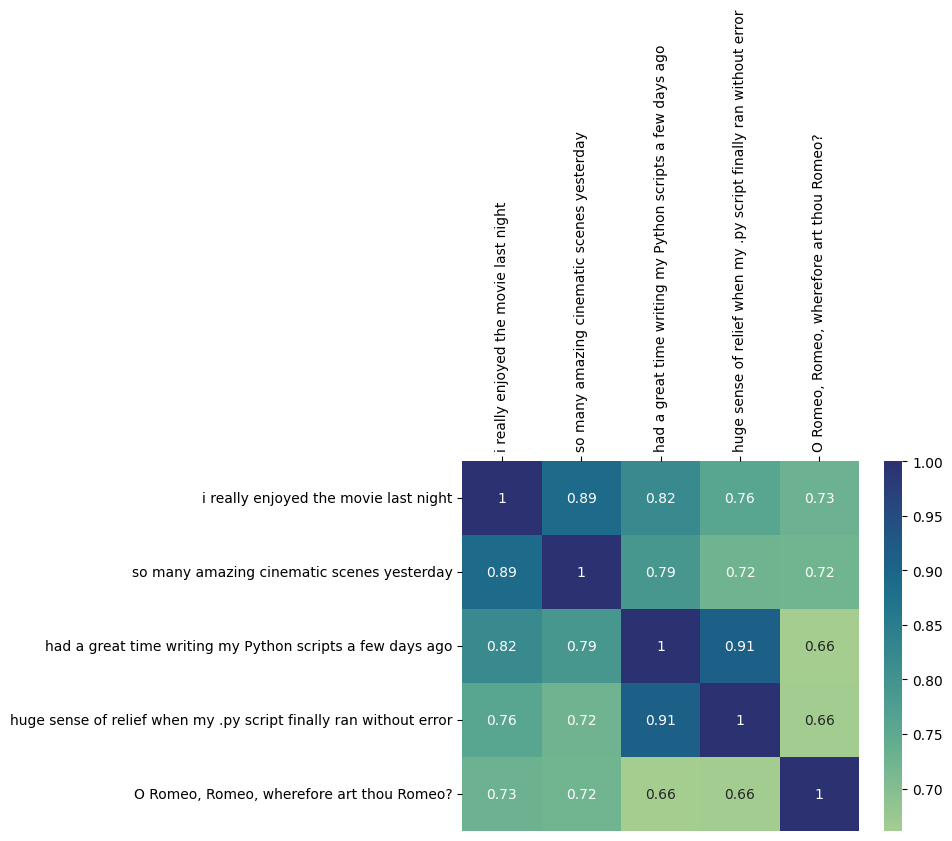

In [ ]:
import seaborn as sns

ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## 멀티모달 임베딩 API

[멀티모달 임베딩](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-multimodal-embeddings) 모델은 [ 128, 256, 512 및 1408(기본값) ]을 생성합니다. 이미지, 텍스트 및 비디오 데이터의 조합을 포함할 수 있는 입력을 기반으로 하는 차원 벡터입니다. 그런 다음 임베딩 벡터를 이미지 분류 또는 비디오 콘텐츠 조정과 같은 후속 작업에 사용할 수 있습니다.

이미지 임베딩 벡터와 텍스트 임베딩 벡터는 동일한 차원을 갖는 동일한 의미 공간에 있습니다. 결과적으로 이러한 벡터는 텍스트로 이미지를 검색하거나 이미지로 비디오를 검색하는 등의 사용 사례에 대해 상호 교환적으로 사용될 수 있습니다.

텍스트 전용 임베딩 사용 사례의 경우 위에서 설명한 대신 Vertex AI 텍스트 임베딩 API를 사용하는 것이 좋습니다.

**사용 사례**

**이미지 및 텍스트:**


* 이미지 분류: 이미지를 입력으로 가져와 하나 이상의 클래스(레이블)를 예측합니다.
* 이미지 검색: 관련성이 있거나 유사한 이미지를 검색합니다.
* 추천: 이미지를 기반으로 제품 또는 광고 추천을 생성합니다.



**이미지, 텍스트, 동영상:**

* 추천 : 영상을 기반으로 상품이나 광고 추천을 생성합니다(유사성 검색).
* 비디오 콘텐츠 검색
    * 의미 검색 사용: 텍스트를 입력으로 사용하고 쿼리와 일치하는 순위 프레임 집합을 반환합니다.
* 유사성 검색 사용:
    * 비디오를 입력으로 사용하고 쿼리와 일치하는 비디오 세트를 반환합니다.
    * 이미지를 입력으로 사용하고 쿼리와 일치하는 동영상 세트를 반환합니다.
* 비디오 분류: 비디오를 입력으로 사용하고 하나 이상의 클래스를 예측합니다.


In [ ]:
def get_image_video_text_embeddings(
    image_path: Optional[str] = None,
    video_path: Optional[str] = None,
    contextual_text: Optional[str] = None,
    dimension: Optional[int] = None,
    video_segment_config: Optional[VideoSegmentConfig] = None,
    debug: bool = False,
) -> MultiModalEmbeddingResponse:
    """Generates multimodal embeddings from image, video, and text.

    Args:
        image_path: Path to image (local or Google Cloud Storage).
        video_path: Path to video (local or Google Cloud Storage).
        contextual_text: Text to generate embeddings for. Max: 32 tokens (~32 words).
        dimension: Dimension of the returned embeddings (128, 256, 512, or 1408).
        video_segment_config: Defines specific video segments for embedding generation.
        debug: If True, print debugging information.

    Returns:
        MultiModalEmbeddingResponse: The generated embeddings.

    Raises:
        ValueError: If neither image_path, video_path, nor contextual_text is provided.
    """

    # Input validation
    if not any([image_path, video_path, contextual_text]):
        raise ValueError(
            "At least one of image_path, video_path, or contextual_text must be provided."
        )

    image = VMImage.load_from_file(image_path) if image_path else None
    video = VMVideo.load_from_file(video_path) if video_path else None

    embeddings = mm_embedding_model.get_embeddings(
        image=image,
        video=video,
        video_segment_config=video_segment_config,
        contextual_text=contextual_text,
        dimension=dimension,
    )

    # Prepare result dictionary for better organization
    result = {}

    if image_path:
        if debug:
            print(
                f"Image Embedding (first five):\n{embeddings.image_embedding[:5]}"
            )
            print(f"Dimension of Image Embedding: {len(embeddings.image_embedding)}")
        result["image_embedding"] = embeddings.image_embedding

    if video_path:
        if debug:
            print("Video Embeddings:")
        video_embedding_list = [
            {
                "start_offset_sec": video_embedding.start_offset_sec,
                "end_offset_sec": video_embedding.end_offset_sec,
                "embedding": video_embedding.embedding,
            }
            for video_embedding in embeddings.video_embeddings
        ]
        result["video_embeddings"] = video_embedding_list

        if debug:
            for embedding in video_embedding_list:
                print(
                    f"\nVideo Segment (in seconds): {embedding['start_offset_sec']} - {embedding['end_offset_sec']}"
                )
                print(f"Embedding (first five): {embedding['embedding'][:5]}")
                print(f"Dimension of Video Embedding: {len(embedding['embedding'])}")

    if contextual_text:
        if debug:
            print(f"\n\nText Embedding (first five):\n{embeddings.text_embedding[:5]}")
            print(f"Dimension of Text Embedding: {len(embeddings.text_embedding)}")
        result["text_embedding"] = embeddings.text_embedding

    return result

여기서는 이 이미지에 대한 임베딩을 생성해 보겠습니다.

<a href="https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEACBA104999.jpg"><img src="https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEACBA104999.jpg" width="200px"/></a>


In [ ]:
# Image embeddings with default 1408 dimension
result = get_image_video_text_embeddings(
    image_path="gs://github-repo/embeddings/getting_started_embeddings/gms_images/GGOEACBA104999.jpg",
    debug=True,
)

Image Embedding (first five):
[-0.000501200848, 0.0334769525, -0.0165630654, 0.0210420564, -0.00548546249]
Dimension of Image Embedding: 1408


In [ ]:
# Image embeddings with 256 dimension
result = get_image_video_text_embeddings(
    image_path="gs://github-repo/embeddings/getting_started_embeddings/gms_images/GGOEAFKA194799.jpg",
    dimension=256,  # Available values: 128, 256, 512, and 1408 (default)
    debug=True,
)

Image Embedding (first five):
[0.24790296, -0.0226713903, 0.0741962269, -0.0817717761, 0.00277115637]
Dimension of Image Embedding: 256


이제 이 비디오에 대한 임베딩을 생성하겠습니다.

In [ ]:
from IPython.display import Video

Video("https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/BrushingTeeth/v_BrushingTeeth_g01_c02.mp4")


In [ ]:
# Video embedding only supports 1408 dimension
result = get_image_video_text_embeddings(
    video_path="gs://github-repo/embeddings/getting_started_embeddings/UCF-101-subset/BrushingTeeth/v_BrushingTeeth_g01_c02.mp4",
    debug=True,
)

Video Embeddings:

Video Segment (in seconds): 0.0 - 4.0
Embedding (first five): [-0.011429769, 0.0216635913, -0.00484448, -0.0174837187, -0.00420923112]
Dimension of Video Embedding: 1408


In [ ]:
# Video embeddings with 1408 dimensions and Video Segment.
# Video embedding only supports 1408 dimensions for now.

result = get_image_video_text_embeddings(
    video_path="gs://github-repo/embeddings/getting_started_embeddings/Googles newest and most capable AI  Gemini.mp4",
    video_segment_config=VideoSegmentConfig(
        start_offset_sec=0, end_offset_sec=120, interval_sec=60
    ),
    debug=True,
)  # printing first 10 vectors only

Video Embeddings:

Video Segment (in seconds): 0.0 - 60.0
Embedding (first five): [0.000334106095, 0.0290362947, -0.0129606919, -0.0044198106, 0.0164410602]
Dimension of Video Embedding: 1408

Video Segment (in seconds): 60.0 - 120.0
Embedding (first five): [-0.0124471011, 0.025856914, -0.00568131171, -0.00386897032, 0.0093672378]
Dimension of Video Embedding: 1408


## 사용 사례: 임베딩을 사용하여 간단한 검색 구축


### 처음부터 데이터에 대한 임베딩 구축


#### 동영상 임베딩

In [ ]:
data_url = "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/video_data_without_embeddings.csv"
video_data_without_embeddings = pd.read_csv(data_url)
video_data_without_embeddings.head()

,gcs_path,category,file_name
0,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c04.mp4
1,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c03.mp4
2,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g13_c03.mp4
3,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g21_c04.mp4
4,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g07_c02.mp4


In [ ]:
# This will take around 3 minutes

# Create new dataframe to store embeddings
video_data_without_embeddings = pd.read_csv(data_url)
video_data_with_embeddings = video_data_without_embeddings.copy()

# Get Video Embeddings
video_data_with_embeddings["video_embeddings"] = (
    video_data_without_embeddings["gcs_path"]
    .apply(
        lambda x: get_image_video_text_embeddings(video_path=x)['video_embeddings'][0]['embedding']
    )
)

video_data_with_embeddings.head()

,gcs_path,category,file_name,video_embeddings
0,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c04.mp4,"[0.0202900749, 0.0199354813, 0.00593805593, 0...."
1,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c03.mp4,"[0.0169571079, 0.018768847, 0.00541665731, 0.0..."
2,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g13_c03.mp4,"[0.0163685065, 0.028343305, 0.00337404246, 0.0..."
3,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g21_c04.mp4,"[0.00952927209, 0.00808039, -0.00393202947, 0...."
4,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g07_c02.mp4,"[0.0199827421, -0.00170351926, 0.00969026051, ..."


#### 이미지 및 텍스트 임베딩

In [ ]:
data_url = "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/image_data_without_embeddings.csv"
image_data_without_embeddings = pd.read_csv(data_url)
image_data_without_embeddings.head()

,parent_sku,parent_description,retail_price,img_url,seo_url,title,shortdesc,longdesc,keywords,metadescription,file_path,gcs_path
0,GGOEAXXX1947,Android Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Android Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Android Keyboard Sticker,Shop Google Merchandise store for Android Keyb...,/content/data/gms_images/GGOEAFKA194799.jpg,gs://github-repo/embeddings/getting_started_em...
1,GGOEGXXX1238,Google Pen Neon Coral,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Pen Neon Coral,Whether you are signing official documents or ...,<div><p>Soft touch surface.</p><p>Fine point g...,"Google Pen Neon Coral, Google, pen, orange, co...",Shop Google Merchandise Store for Google Pen N...,/content/data/gms_images/GGOEGOAN123899.jpg,gs://github-repo/embeddings/getting_started_em...
2,GGOEGXXX1983,Google Hologram Sunnyvale Campus Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Hologram Sunnyvale Campus Sticker,"Nostalgic and fun for everyone, our exclusive ...","<div><p dir=""ltr""><span>Sticker measures 3 H</...",Google Hologram Sunnyvale Campus Sticker,Shop Google Merchandise store for Google Holog...,/content/data/gms_images/GGOEGCKA198399.jpg,gs://github-repo/embeddings/getting_started_em...
3,GGOEGXXX1773,Google Maps Wheat Pen,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Maps Wheat Pen,Drop your pen to paper and start planning your...,<div><p>Black Ink </p><p>Retractable medium ba...,Google Maps Wheat Pen,Shop Google Merchandise Store for Google Maps ...,/content/data/gms_images/GGOEGOAB177399.jpg,gs://github-repo/embeddings/getting_started_em...
4,GGOECXXX1946,Google Cloud Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Cloud Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Google Cloud Keyboard Sticker,Shop Google Merchandise store for Google Cloud...,/content/data/gms_images/GGOECFKA194699.jpg,gs://github-repo/embeddings/getting_started_em...


In [ ]:
# This will take around 5 minutes

# Create new dataframe to store embeddings
image_data_with_embeddings = image_data_without_embeddings.copy()

# Combining all the text metadata in a single column.
image_data_with_embeddings["combined_text"] = (
    image_data_with_embeddings["title"].fillna("")
    + " "
    + image_data_with_embeddings["keywords"].fillna("")
    + " "
    + image_data_with_embeddings["metadescription"].fillna("")
)

# Get Image and Text Embeddings

# Taking default 1408 dimension
image_data_with_embeddings["image_embeddings"] = image_data_with_embeddings[
    "gcs_path"
].apply(lambda x: get_image_video_text_embeddings(image_path=x)["image_embedding"])
# Taking default 768 dimension
image_data_with_embeddings["text_embeddings"] = image_data_with_embeddings[
    "combined_text"
].apply(lambda x: embed_text([x])[0])

image_data_with_embeddings.head()

,parent_sku,parent_description,retail_price,img_url,seo_url,title,shortdesc,longdesc,keywords,metadescription,file_path,gcs_path,combined_text,image_embeddings,text_embeddings
0,GGOEAXXX1947,Android Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Android Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Android Keyboard Sticker,Shop Google Merchandise store for Android Keyb...,/content/data/gms_images/GGOEAFKA194799.jpg,gs://github-repo/embeddings/getting_started_em...,Android Keyboard Sticker Android Keyboard Stic...,"[-0.0197119862, -0.00683858059, 0.0385048464, ...","[-0.0012859634589403868, -0.016701804473996162..."
1,GGOEGXXX1238,Google Pen Neon Coral,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Pen Neon Coral,Whether you are signing official documents or ...,<div><p>Soft touch surface.</p><p>Fine point g...,"Google Pen Neon Coral, Google, pen, orange, co...",Shop Google Merchandise Store for Google Pen N...,/content/data/gms_images/GGOEGOAN123899.jpg,gs://github-repo/embeddings/getting_started_em...,"Google Pen Neon Coral Google Pen Neon Coral, G...","[0.0312969163, 0.0266798828, -0.00428776024, 0...","[0.016387127339839935, 0.0025150571018457413, ..."
2,GGOEGXXX1983,Google Hologram Sunnyvale Campus Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Hologram Sunnyvale Campus Sticker,"Nostalgic and fun for everyone, our exclusive ...","<div><p dir=""ltr""><span>Sticker measures 3 H</...",Google Hologram Sunnyvale Campus Sticker,Shop Google Merchandise store for Google Holog...,/content/data/gms_images/GGOEGCKA198399.jpg,gs://github-repo/embeddings/getting_started_em...,Google Hologram Sunnyvale Campus Sticker Googl...,"[-0.0115589192, 0.023388654, 0.0509907156, 0.0...","[0.010234640911221504, 0.004717140458524227, -..."
3,GGOEGXXX1773,Google Maps Wheat Pen,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Maps Wheat Pen,Drop your pen to paper and start planning your...,<div><p>Black Ink </p><p>Retractable medium ba...,Google Maps Wheat Pen,Shop Google Merchandise Store for Google Maps ...,/content/data/gms_images/GGOEGOAB177399.jpg,gs://github-repo/embeddings/getting_started_em...,Google Maps Wheat Pen Google Maps Wheat Pen Sh...,"[0.0108121429, 0.0177405756, -0.0159502644, 0....","[0.015066391788423061, -0.01680287905037403, -..."
4,GGOECXXX1946,Google Cloud Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Cloud Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Google Cloud Keyboard Sticker,Shop Google Merchandise store for Google Cloud...,/content/data/gms_images/GGOECFKA194699.jpg,gs://github-repo/embeddings/getting_started_em...,Google Cloud Keyboard Sticker Google Cloud Key...,"[-0.0243012719, 0.0230777543, 0.0397965573, 0....","[0.004095810931175947, 0.0011727195233106613, ..."


## 미리 계산된 임베딩 로드

In [ ]:
# Comment this cell, if you are computing embeddings from scratch.

# image_data_with_embeddings = pd.read_csv(
#     "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/image_data_with_embeddings.csv"
# )  # dimensions; image = 1408, text = 768

# image_data_with_embeddings.head(3)

,parent_sku,parent_description,retail_price,img_url,seo_url,title,shortdesc,longdesc,keywords,metadescription,file_path,gcs_path,combined_text,image_embeddings,text_embeddings
0,GGOEAXXX1947,Android Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Android Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Android Keyboard Sticker,Shop Google Merchandise store for Android Keyb...,/content/data/gms_images/GGOEAFKA194799.jpg,gs://github-repo/embeddings/getting_started_em...,Android Keyboard Sticker Android Keyboard Stic...,"[-0.019712951, -0.00683932705, 0.0385046713, 0...","[-0.0003441123408265412, -0.020794985815882683..."
1,GGOEGXXX1238,Google Pen Neon Coral,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Pen Neon Coral,Whether you are signing official documents or ...,<div><p>Soft touch surface.</p><p>Fine point g...,"Google Pen Neon Coral, Google, pen, orange, co...",Shop Google Merchandise Store for Google Pen N...,/content/data/gms_images/GGOEGOAN123899.jpg,gs://github-repo/embeddings/getting_started_em...,"Google Pen Neon Coral Google Pen Neon Coral, G...","[0.0312964357, 0.0266801305, -0.00428772392, 0...","[0.015119598247110844, -0.05192413181066513, -..."
2,GGOEGXXX1983,Google Hologram Sunnyvale Campus Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Hologram Sunnyvale Campus Sticker,"Nostalgic and fun for everyone, our exclusive ...","<div><p dir=""ltr""><span>Sticker measures 3 H</...",Google Hologram Sunnyvale Campus Sticker,Shop Google Merchandise store for Google Holog...,/content/data/gms_images/GGOEGCKA198399.jpg,gs://github-repo/embeddings/getting_started_em...,Google Hologram Sunnyvale Campus Sticker Googl...,"[-0.0115588326, 0.0233894847, 0.0509909727, 0....","[0.008340244181454182, -0.019928857684135437, ..."


In [ ]:
# video_data_with_embeddings = pd.read_csv(
#     "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/video_data_with_embeddings.csv"
# )  # dimensions; video = 1408

# video_data_with_embeddings.head()

,Unnamed: 0,gcs_path,category,file_name,video_embeddings
0,0,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c04.mp4,"[0.0212469846, 0.021904517, 0.00673244661, 0.0..."
1,1,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c03.mp4,"[0.0150156552, 0.0182044469, 0.00531015405, 0...."
2,2,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g13_c03.mp4,"[0.0176973231, 0.0306478031, 0.0060283, 0.0190..."
3,3,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g21_c04.mp4,"[0.00879747886, 0.00810849108, -0.00468777, 0...."
4,4,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g07_c02.mp4,"[0.0203397758, -0.000400501624, 0.00930729136,..."


## 사용 사례 - 이미지 및 텍스트

### 텍스트 검색어를 기반으로 상품을 찾아보세요.


In [ ]:
from IPython.display import Image as ImageByte, display


def get_url_from_gcs(gcs_uri: str) -> str:
    """Converts a Google Cloud Storage (GCS) URI to a publicly accessible URL.

    Args:
        gcs_uri: The GCS URI in the format gs://bucket-name/object-name.

    Returns:
        The corresponding public URL for the object.
    """
    return gcs_uri.replace("gs://", "https://storage.googleapis.com/").replace(
        " ", "%20"
    )


def print_shortlisted_products(
    shortlisted_products: Union[Dict, Any], display_flag: bool = False
) -> None:
    """Prints information about shortlisted products, optionally displaying images.

    Args:
        shortlisted_products: A dictionary-like object containing product data with 'score' and 'gcs_path' keys.
        display_flag: If True, displays images of the products using IPython.
    """
    print("Similar product identified ---- \n")

    for (
        index,
        product,
    ) in shortlisted_products.iterrows():  # Iterate directly over rows for clarity
        score = product["score"]
        gcs_path = product["gcs_path"]
        url = get_url_from_gcs(gcs_path)

        print(f"Product {index + 1}: Confidence Score: {score}")
        print(url)

        if display_flag:
            # display(ImageByte(url=url), width=200)  # Simplified image display
            display(ImageByte(url, width=200))
            print()  # Add an empty line for visual separation

**코사인 유사성: 크기가 아닌 방향의 척도**


코사인 유사성은 두 벡터(예: 공간의 점) 간의 유사성을 측정하는 수학적 도구입니다. 벡터를 화살표로 생각해보세요.
* **방향:** 각 벡터는 특정 방향을 가리킵니다.
* **길이:** 각 벡터에는 특정 길이(크기)가 있습니다.




코사인 유사성은 길이를 무시하고 두 벡터 사이의 각도에 중점을 둡니다. 두 벡터가 거의 같은 방향을 가리키면 매우 유사한 것으로 간주됩니다(코사인 유사도가 1에 가까움). 직각에 있으면 완전히 다른 것입니다(코사인 유사도 0). 반대 방향은 -1의 유사성을 제공합니다.


[코사인 유사성](https://en.wikipedia.org/wiki/Cosine_similarity)에 대해 자세히 알아보세요.


**임베딩: 데이터를 벡터로 변환**


기계 학습에서 임베딩은 복잡한 데이터(예: 텍스트, 이미지, 비디오)를 벡터로 표현하는 방법입니다. 이를 통해 코사인 유사성과 같은 수학적 연산을 적용할 수 있습니다. 예를 들어:


* **단어 임베딩:** 비슷한 의미를 가진 단어에는 비슷한 방향을 가리키는 벡터가 있습니다.
* **이미지 임베딩:** 유사한 콘텐츠(예: 고양이 사진 두 장)가 있는 이미지에는 사이에 작은 각도가 있는 벡터가 있습니다.
* **동영상 임베딩:** 동일한 이벤트 또는 유사한 주제의 동영상에는 유사한 벡터 표현이 있습니다.


**벡터의 기타 거리 측정법**


코사인 유사성은 널리 사용되지만 벡터 간의 거리를 측정하는 유일한 방법은 아닙니다. 다음은 몇 가지 다른 사항입니다.


* **유클리드 거리:** 두 점 사이의 직선 거리입니다. 크기의 차이에 민감합니다.
* **맨해튼 거리:** 그리드(예: 도시 블록)를 따라서만 이동할 수 있는 경우 두 지점 사이의 거리입니다.
* **해밍 거리:** 두 벡터가 서로 다른 위치의 수입니다(종종 이진 데이터에 사용됨).


**올바른 거리 측정법 선택**
가장 좋은 거리 측정법은 특정 애플리케이션에 따라 다릅니다. 코사인 유사성은 항목의 절대 크기보다는 항목 간의 관계(예: 단어의 의미, 이미지 내용)에 더 관심이 있을 때 선호되는 경우가 많습니다.

In [ ]:
search_query = "I am looking for something related to dinosaurs theme"

In [ ]:
# Steps to get similar products

# Step 1 - Convert 'search_query' to embeddings
search_query_embedding = embed_text(texts=[search_query],
                                    dimensionality=512)[0]

# Step 2 - Find cosine similarity (or simply np.dot) of search_query_embedding and image_data_with_embeddings['text_embeddings']
cosine_scores = image_data_with_embeddings["text_embeddings"].apply(
    lambda x: round(np.dot(x, search_query_embedding), 2)
)  # eval is used to convert string of list to list

# Step 3 - Sort the cosine score and pick the top 3 results
top_3_indices = cosine_scores.nlargest(3).index.tolist()
top_n_cosine_values = cosine_scores.nlargest(3).values.tolist()

# Step 4 - Filter image_data_with_embeddings with the shortlisted index and add score
shortlisted_products = image_data_with_embeddings.iloc[top_3_indices]
shortlisted_products.loc[:, "score"] = top_n_cosine_values

# Step 5 - Display the shortlisted products
print_shortlisted_products(
    shortlisted_products,
    display_flag=True
)  # pass display_flag=True to display the images

TypeError: eval() arg 1 must be a string, bytes or code object

In [ ]:
def get_similar_products_from_text_query(
    search_query: str,
    top_n: int = 3,
    threshold: float = 0.6,
    embeddings_data: pd.DataFrame = image_data_with_embeddings,
) -> Optional[pd.DataFrame]:
    """
    Retrieves the most similar products to a given text query based on embeddings.

    Args:
        search_query: The text query to find similar products for.
        top_n: The maximum number of similar products to return.
        threshold: The minimum cosine similarity score for a product to be considered similar.
        embeddings_data: A DataFrame containing text embeddings for products (assumes a column named 'text_embeddings').

    Returns:
        A DataFrame with the top_n similar products and their scores, or None if none meet the threshold.
    """

    # Step 1: Embed the search query
    search_query_embedding = embed_text([search_query])[
        0
    ]  # Assuming 'embed_text' is a function you have

    # Step 2: Calculate cosine similarities (optimize by avoiding apply and eval)
    cosine_scores = image_data_with_embeddings["text_embeddings"].apply(
        lambda x: round(np.dot(eval(x), search_query_embedding), 2)
    )

    # Step 3: Filter and sort scores
    scores_above_threshold = cosine_scores[cosine_scores >= threshold]
    top_n_indices = scores_above_threshold.nlargest(top_n).index.tolist()

    # Step 4: Handle cases with insufficient scores
    if len(top_n_indices) < top_n:
        print(f"Warning: Only {len(top_n_indices)} scores meet the threshold.")

    # Step 5: Get shortlisted products with scores (optimize by direct assignment)
    if top_n_indices:
        shortlisted_products = embeddings_data.iloc[top_n_indices].copy()
        shortlisted_products["score"] = scores_above_threshold.nlargest(
            top_n
        ).values.tolist()
    else:
        print("No scores meet the threshold. Consider lowering the threshold.")
        shortlisted_products = None

    return shortlisted_products

In [ ]:
search_query = "Do you have socks in checkered patterns?"

shortlisted_products = get_similar_products_from_text_query(
    search_query, top_n=3, threshold=0.7
)

print_shortlisted_products(shortlisted_products)

In [ ]:
search_query = "I am looking for sweatshirt with google logo and probably should be in embroidered pattern"

shortlisted_products = get_similar_products_from_text_query(
    search_query, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products)

### 이미지 기반 유사상품 찾기(선택상품)

In [ ]:
random_index = 130
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")


print(get_url_from_gcs(liked_product))

# to display the image
display(ImageByte(url=get_url_from_gcs(liked_product), width=200))

In [ ]:
# Steps to get similar products

# Step 1 - Convert 'liked_product' to embeddings
liked_product_embedding = get_image_video_text_embeddings(image_path=liked_product)[
    "image_embedding"
]

# Step 2 - Find cosine similarity (or simply np.dot) of liked_product_embedding and image_data_with_embeddings['image_embeddings']
cosine_scores = image_data_with_embeddings["image_embeddings"].apply(
    lambda x: round(np.dot(eval(x), liked_product_embedding), 2)
)  # eval is used to convert string of list to list


# Step 3 - Sort the cosine score, filter with threshold (matching should be less than 1.0 and greater than high value) and pick the top 2 results
threshold = 0.6
scores_above_threshold = cosine_scores[
    (cosine_scores >= threshold) & (cosine_scores < 1.00)
]
top_2_indices = scores_above_threshold.nlargest(2).index.tolist()
top_2_cosine_values = scores_above_threshold.nlargest(2).values.tolist()

# Step 4 - Filter image_data_with_embeddings with the shortlisted index
shortlisted_products = image_data_with_embeddings.iloc[top_2_indices]
shortlisted_products.loc[:, "score"] = top_2_cosine_values

# Step 5 - Display the shortlisted product.
print_shortlisted_products(shortlisted_products, display_flag=True)

In [ ]:
def get_similar_products_from_image_query(
    liked_product: Union[str, np.ndarray], top_n: int = 3, threshold: float = 0.6
) -> Optional[pd.DataFrame]:
    """
    Retrieves similar products based on an image query.

    This function takes an image path or embedding of a "liked" product, compares it to
    a dataset of product embeddings, and returns the top N most similar products
    that exceed a specified similarity threshold.

    Args:
        liked_product: Path to the image file of the liked product or its embedding.
        top_n: The maximum number of similar products to return.
        threshold: The minimum cosine similarity score for a product to be considered similar.

    Returns:
        A pandas DataFrame containing the top N similar products and their scores,
        or None if no products meet the threshold.
    """

    # Step 1: Ensure the `liked_product` is an embedding
    if isinstance(liked_product, str):
        liked_product_embedding = get_image_video_text_embeddings(
            image_path=liked_product
        )["image_embedding"]
    else:
        liked_product_embedding = liked_product

    # Step 2: Calculate cosine similarities
    # Convert embeddings to numpy arrays for efficient calculation if necessary
    if isinstance(image_data_with_embeddings["image_embeddings"].iloc[0], str):
        image_data_with_embeddings["image_embeddings"] = image_data_with_embeddings[
            "image_embeddings"
        ].apply(eval)
    cosine_scores = image_data_with_embeddings["image_embeddings"].apply(
        lambda x: np.dot(x, liked_product_embedding)
    )

    # Step 3: Filter and select top scores
    scores_above_threshold = cosine_scores[
        (cosine_scores >= threshold) & (cosine_scores < 1.0)
    ]
    top_n_indices = scores_above_threshold.nlargest(top_n).index.tolist()
    top_n_cosine_values = scores_above_threshold.nlargest(top_n).values.tolist()

    # Step 4: Log insufficient scores (optional)
    if len(top_n_indices) < top_n:
        print(f"Warning: Only {len(top_n_indices)} scores meet the threshold.")

    # Step 5: Return results if scores are available
    if top_n_indices:
        shortlisted_products = image_data_with_embeddings.iloc[top_n_indices].copy()
        shortlisted_products["score"] = top_n_cosine_values
        return shortlisted_products

    else:
        print("No scores meet the threshold. Consider lowering the threshold.")
        return None

In [ ]:
random_index = 9
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")
print(get_url_from_gcs(liked_product))

# to display the image
# display(ImageByte(url=get_url_from_gcs(liked_product)))

In [ ]:
# get recommendation for the liked product (image)
shortlisted_products = get_similar_products_from_image_query(
    liked_product, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products)

In [ ]:
random_index = 120
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")

print(get_url_from_gcs(liked_product))

# to display the image
display(ImageByte(url=get_url_from_gcs(liked_product), width=200))

In [ ]:
# get recommendation for the liked product (image)
shortlisted_products = get_similar_products_from_image_query(
    liked_product, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products, display_flag=True)

### 비슷한 동영상 찾기

In [ ]:
def display_video_gcs(
    gcs_uri: Optional[str] = None, public_gcs_url: Optional[str] = None
) -> None:
    """Displays a video hosted on Google Cloud Storage (GCS) in a Jupyter Notebook.

    Args:
        gcs_uri: The GCS URI of the video.
        public_gcs_url: The public URL of the video, if available. If not provided and
            `gcs_uri` is given, the function will attempt to generate the public URL.

    Raises:
        ValueError: If neither `gcs_uri` nor `public_gcs_url` is provided.
    """
    if not gcs_uri and not public_gcs_url:
        raise ValueError("Either gcs_uri or public_gcs_url must be provided.")

    if gcs_uri and not public_gcs_url:
        public_gcs_url = get_url_from_gcs(
            gcs_uri
        )  # Assuming you have a helper function for this

    html_code = f"""
    <video width="640" height="480" controls>
        <source src="{public_gcs_url}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """
    display(HTML(html_code))


def print_shortlisted_video(
    shortlisted_videos: List[Dict], display_flag: bool = False
) -> None:
    """Prints information about shortlisted videos and optionally displays them.

    Args:
        shortlisted_videos: A list of dictionaries where each dictionary represents a video
            with keys 'score' (float) and 'gcs_path' (str).
        display_flag: If True, displays each video in the notebook.
    """
    print("Similar videos identified ---- \n")

    for i in range(len(shortlisted_videos)):
        print(f"Video {i+1}: Confidence Score: {shortlisted_products['score'].iloc[i]}")

        url = get_url_from_gcs(shortlisted_videos["gcs_path"].values[i])
        print(url)
        if display_flag:
            display_video_gcs(public_gcs_url=url)
            # IPython.display.display(load_image_from_url(url))
            print()  # Add an empty line for visual separation

In [ ]:
from IPython.display import HTML

random_index = 10
liked_video = video_data_with_embeddings["gcs_path"][random_index]
public_gcs_url = get_url_from_gcs(video_data_with_embeddings["gcs_path"][1])

print(public_gcs_url)

In [ ]:
# Steps to get similar video

# Step 1 - Convert 'liked_video' to embeddings
liked_video_embedding = get_image_video_text_embeddings(video_path=liked_video)[
    "video_embeddings"
][0]["embedding"]


# Step 2 - Find cosine similarity (or simply np.dot) of liked_video_embedding and video_data_with_embeddings['video_embeddings']
cosine_scores = video_data_with_embeddings["video_embeddings"].apply(
    lambda x: round(np.dot(eval(x), liked_video_embedding), 2)
)  # eval is used to convert string of list to list


# Step 3 - Sort the cosine score, filter with threshold (matching should be less than 1.0 and greater than high value) and pick the top 2 results
threshold = 0.6
scores_above_threshold = cosine_scores[
    (cosine_scores >= threshold) & (cosine_scores < 1.00)
]
top_2_indices = scores_above_threshold.nlargest(2).index.tolist()
top_2_cosine_values = scores_above_threshold.nlargest(2).values.tolist()

# Step 4 - Filter video_data_with_embeddings with the shortlisted index
shortlisted_videos = video_data_with_embeddings.iloc[top_2_indices]
shortlisted_videos.loc[:, "score"] = top_2_cosine_values

# Step 5 - Display the shortlisted video.
print_shortlisted_video(shortlisted_videos)  # display_flag=True

In [ ]:
def get_similar_videos_from_video_query(
    liked_video: str, top_n: int = 3, threshold: float = 0.6
) -> pd.DataFrame:
    """
    Retrieves similar videos to a given 'liked_video' using embeddings and cosine similarity.

    Args:
        liked_video: The path to the video to find similar videos for.
        top_n: The maximum number of similar videos to return.
        threshold: The minimum cosine similarity score for a video to be considered similar.

    Returns:
        A pandas DataFrame containing the shortlisted videos with their similarity scores.
    """

    # Step 1: Get the embeddings for the 'liked_video'
    liked_video_embeddings = get_image_video_text_embeddings(video_path=liked_video)[
        "video_embeddings"
    ][0]["embedding"]

    # Ensure video_data_with_embeddings is available (you might need to load or define it)
    if "video_data_with_embeddings" not in globals():
        raise ValueError("video_data_with_embeddings DataFrame is not defined.")

    # Step 2: Calculate cosine similarities with pre-loaded video embeddings
    cosine_scores = video_data_with_embeddings["video_embeddings"].apply(
        lambda x: round(
            np.dot(eval(x), liked_video_embeddings), 2
        )  # Safely convert embeddings to arrays
    )

    # Step 3: Filter and sort based on threshold and top_n
    scores_above_threshold = cosine_scores[
        (cosine_scores >= threshold) & (cosine_scores < 1.00)
    ]
    top_indices = scores_above_threshold.nlargest(top_n).index.tolist()
    top_cosine_values = scores_above_threshold.nlargest(top_n).values.tolist()

    # Step 4: Get the shortlisted videos with scores
    shortlisted_videos = video_data_with_embeddings.iloc[top_indices].copy()
    shortlisted_videos["score"] = top_cosine_values

    return shortlisted_videos

In [ ]:
random_index = 24
liked_video = video_data_with_embeddings["gcs_path"][random_index]
public_gcs_url = get_url_from_gcs(video_data_with_embeddings["gcs_path"][1])

print(public_gcs_url)

In [ ]:
shortlisted_videos = get_similar_videos_from_video_query(
    liked_video, top_n=3, threshold=0.6
)
print_shortlisted_video(shortlisted_videos)

다음 시리즈:

- 벡터(임베딩)를 Vertex Vector Store에 저장하는 방법 알아보기: [노트북](https://github.com/lavinigam-gcp/generative-ai/blob/main/embeddings/Vector-search-quickstart.ipynb)

- 자신의 데이터로 임베딩을 조정하는 방법 알아보기: [노트북](https://github.com/lavinigam-gcp/generative-ai/blob/main/embeddings/intro_embeddings_tuning.ipynb)

- 임베딩을 사용하여 텍스트 RAG 및 멀티모달 RAG를 수행하는 방법 알아보기: [노트북](https://github.com/lavinigam-gcp/generative-ai/blob/main/gemini/use-cases/retrieval-augmented- Generation/ intro_multimodal_rag.ipynb)